# Time Series Forecasting

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


In [37]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [38]:
df['Month'] = df['Month'].apply(lambda x: str(int(x[0])+2021) + '-' + dt.datetime.strptime(x.split('-')[1], '%m').strftime('%B')[:3])

In [39]:
df['Month'] = df['Month'].apply(lambda x: pd.to_datetime(x, format='%Y-%b'))

In [40]:
df.head()

,Month,Sales
0,2022-01-01,266.0
1,2022-02-01,145.9
2,2022-03-01,183.1
3,2022-04-01,119.3
4,2022-05-01,180.3


In [41]:
df.set_index('Month', inplace=True)

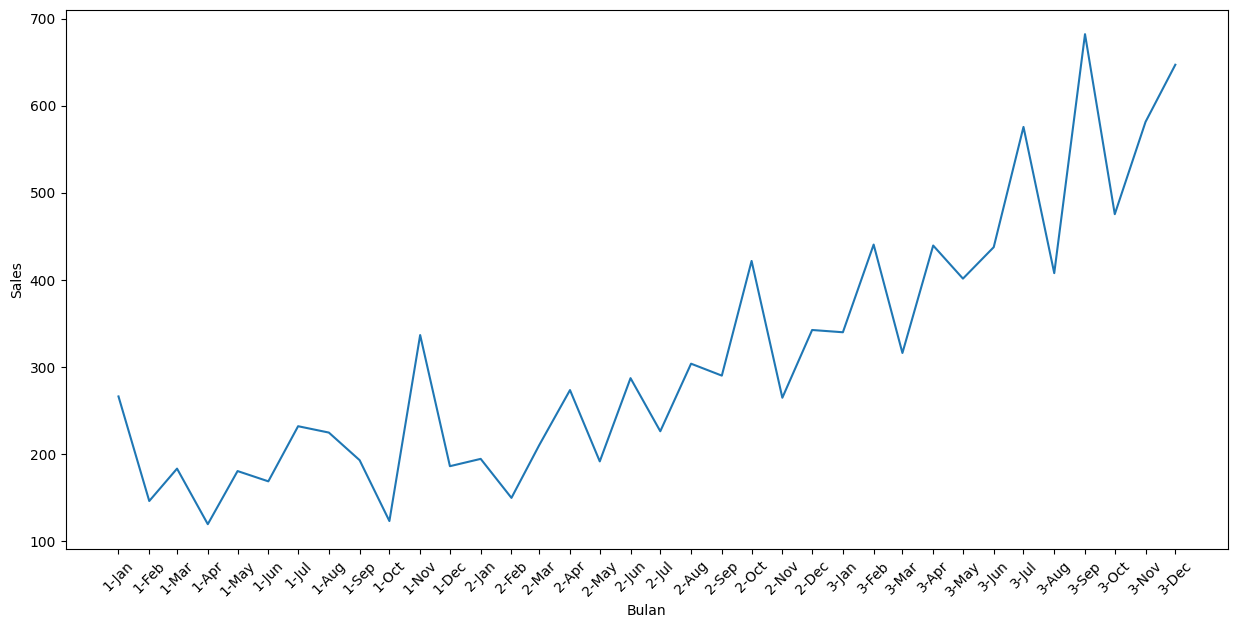

In [42]:
plt.figure(figsize=(15,7))
plt.xlabel('Bulan')
plt.ylabel('Sales')
plt.plot(df['Sales'])
xlabels = [(str(int(d.strftime('%Y')) - 2021) + '-' + d.strftime('%b')) for d in df.index]
plt.xticks(df.index, xlabels, rotation=45)
plt.show()

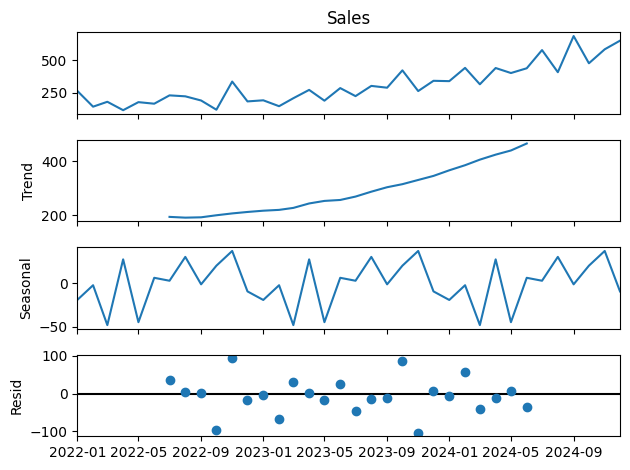

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Sales'], model='additive', period=12)
result.plot()
plt.show()


In [44]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['Sales'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

ADF Statistic: 3.0601420836411815
p-value: 1.0


In [45]:
df['Sales_diff'] = df['Sales'] - df['Sales'].shift(1)

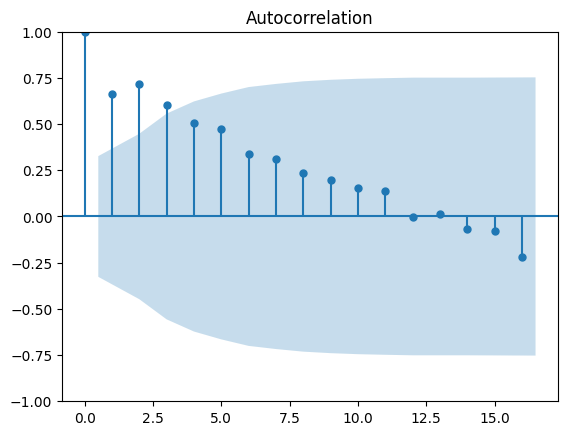

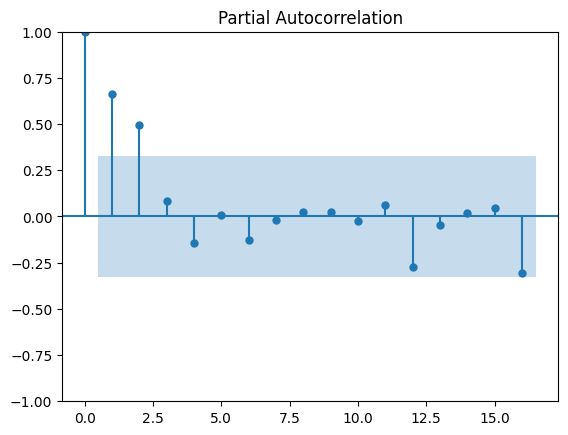

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Sales'].dropna())
plot_pacf(df['Sales'].dropna())
plt.show()


In [47]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Sales'], order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())


c:\Belajar\Bootcamp-DataScience-WisnuHafid\sesi2\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Belajar\Bootcamp-DataScience-WisnuHafid\sesi2\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Belajar\Bootcamp-DataScience-WisnuHafid\sesi2\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Belajar\Bootcamp-DataScience-WisnuHafid\sesi2\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -199.207
Date:                Sat, 10 May 2025   AIC                            408.414
Time:                        10:02:53   BIC                            416.191
Sample:                    01-01-2022   HQIC                           411.098
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5909      0.231     -6.891      0.000      -2.043      -1.138
ar.L2         -0.6726      0.205     -3.287      0.001      -1.074      -0.271
ma.L1          0.7994      2.293      0.349      0.7

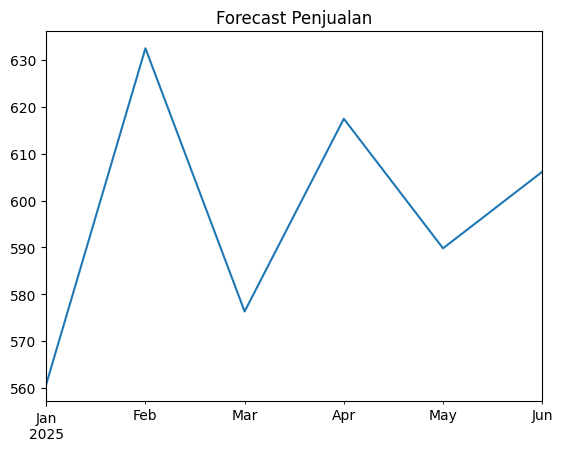

In [48]:
forecast = model_fit.forecast(steps=6)
forecast.plot()
plt.title('Forecast Penjualan')
plt.show()

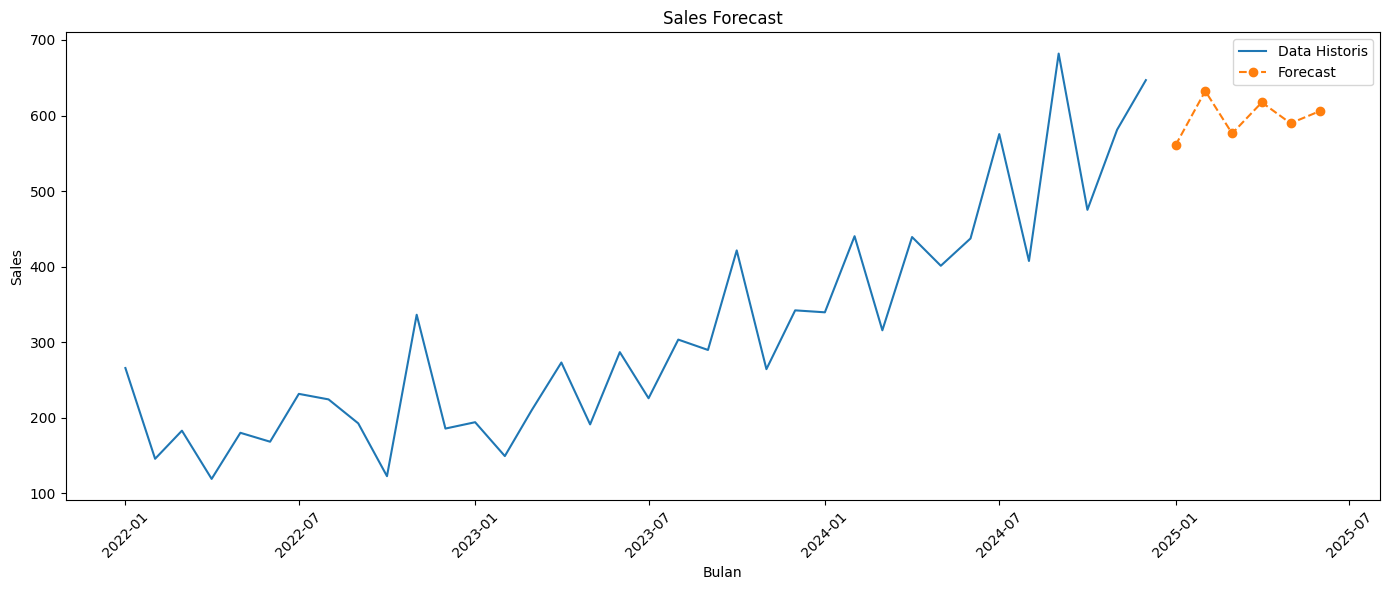

In [49]:
# Buat figure
plt.figure(figsize=(14, 6))

# Plot data historis
plt.plot(df.index, df['Sales'], label='Data Historis')

# Buat index baru untuk forecast
forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=len(forecast), freq='MS')

# Plot hasil forecast
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--', marker='o')

# Tambahkan label
plt.xlabel('Bulan')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()